<a href="https://colab.research.google.com/github/MidoriTinto/Python_For_Data_Analysis/blob/main/Decision_Tree_coded_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding a simple decision tree using mean values and 70/30 ratio
---

The aim of this worksheet is to create a decision tree which will use calculated probabilities to make decisions about whether a row of given data would be classified as *Iris-virginica*, or not, based on sepal and petal dimensions.  It is easier to classify between two values (*Iris-virginica *or not).  Later, using this information, species would be further predicted by probabilities of error.

![Iris-petals and sepals](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)

The workflow is:
*  divide the data set into 70% of the rows for training and 30% for testing  (we can increase the size of the training set later)
*  find first the mean for each of the 4 size columns
*  calculate the proportion of each column that are on or above mean that are of a species (ie proportion of petal-lengths on or above mean that are *Iris-virginica*)
*  infer the proportion of each that are not of that species (using 1 - proportion above).  In both cases we are looking to find if either of these is 1, which could be infered as definitely not that species. 
*  code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of species *iris-virginica*
*  use the decision tree function to predict, for each row in the test set, if the species will be *iris-virginica* or not, using a set of nested if statements to classify
*  compare the predicted values against the actual values in the test set - what proportion were predicted correctly?


### 1 - Investigating the iris data set
---
Let's start by looking at the data.  We are going to use a data set that contains data on iris flowers.

Read the data at this location: https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data

The columns in the CSV file do not have headings, when you read the file, add column headings like this:
```
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, name=names)
```


In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species'] #adding columns to the dataset
iris_data = pd.read_csv(url, names=names)
iris_data


,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#Looking at the first 10 items of the dataframe iris_data
iris_data.head(10)

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#looking at the last 10 rows in the data set iris_data
iris_data.tail(10)

,sepal-length,sepal-width,petal-length,petal-width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
#Find out how many unique values there are in the 'species' column
#this is important for later analysis of each species

iris_data['species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### 2 - split the data into train and test sets
---

Split the data set into and 70% train, 30% test, split.  From now on, just use the train data set.


In [ ]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

# create the classification variables from the all columns
#test_size=0.30 gets us 70% of the dataframe iris_data now  called train
train, test = train_test_split(iris_data, test_size=0.30)
train.describe()
#train

,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.752381,3.017143,3.605714,1.120000
std,0.797725,0.425725,1.725868,0.732803
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.200000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.300000,3.200000,5.000000,1.700000
max,7.700000,4.200000,6.900000,2.500000


In [ ]:
#creating a copy of the train data set to work with -> now called: train_encoded
#train_encoded will be used when calculating values above mean
train_encoded=train.copy() 
train_encoded


,sepal-length,sepal-width,petal-length,petal-width,species
49,5.0,3.3,1.4,0.2,Iris-setosa
111,6.4,2.7,5.3,1.9,Iris-virginica
42,4.4,3.2,1.3,0.2,Iris-setosa
78,6.0,2.9,4.5,1.5,Iris-versicolor
129,7.2,3.0,5.8,1.6,Iris-virginica
...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,Iris-versicolor
64,5.6,2.9,3.6,1.3,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
89,5.5,2.5,4.0,1.3,Iris-versicolor


### 3 - Assumptions and Classification
---

Let's make some assumptions based on the data

1.  Iris-setosa, Iris-versicolor, Iris-virginica are the full range of types of iris to be analysed
2.  Although this is a small data set, the means are fairly representative

First, sepal/petal size will be classified into long/short and wide/narrow with values on or above the mean taken as long or wide and those below as short or narrow. This will be done by encoding the dataframe. 

Calculate, and store the means of the four columns

*  **Test**:
Display train.describe() to see the value of the means of the training set. Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.



In [ ]:
#confirming that the calculated means are the same as the expected out using train.describe()
mean_sl=train_encoded['sepal-length'].mean()
mean_sw=train_encoded['sepal-width'].mean()
mean_pl=train_encoded['petal-length'].mean()
mean_pw=train_encoded['petal-width'].mean()

print(mean_sl, mean_sw, mean_pl, mean_pw)
display(train.describe())

5.7523809523809515 3.017142857142856 3.605714285714286 1.1199999999999999


,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.752381,3.017143,3.605714,1.120000
std,0.797725,0.425725,1.725868,0.732803
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.200000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.300000,3.200000,5.000000,1.700000
max,7.700000,4.200000,6.900000,2.500000


Calculated means using train_decoded (copy of train) are the same as displayed using train dataset.

3.1 **ENCODING THE DATAFRAME**
Now that the mean of each column has been calculated the dataset will be encoded/splitted into two groups: 


1.   Above the mean (>1)
2.   Below the mean ( 0)

This will give you a column with 0 if values are below the mean and 1 for values above the mean.

In [ ]:

# get the mean for each column and apply a function to encode into 1 (above mean) and 0 (mean or below mean)

def encode_iris(train_encoded, **kwds):
  median=kwds['median']
  key=kwds['key']

  if train_encoded[key]> median:
    return 1
  else:
    return 0



#to avoid confusion new columns with a 'above_' are created to store the results 
#please note that after this process the dataframe 'train_encoded' has changed (it now has 4 extra columns as shown below)
train_encoded["above_sepal_length"]=train_encoded.apply(encode_iris, axis=1, key='sepal-length', median=mean_sl)
train_encoded["above_sepal_width"]=train_encoded.apply(encode_iris, axis=1, key='sepal-width', median=mean_sw)
train_encoded["above_petal_length"]=train_encoded.apply(encode_iris, axis=1, key='petal-length', median=mean_pl)
train_encoded["above_petal_width"]=train_encoded.apply(encode_iris, axis=1, key='petal-width', median=mean_pw)
train_encoded




,sepal-length,sepal-width,petal-length,petal-width,species,above_sepal_length,above_sepal_width,above_petal_length,above_petal_width
49,5.0,3.3,1.4,0.2,Iris-setosa,0,1,0,0
111,6.4,2.7,5.3,1.9,Iris-virginica,1,0,1,1
42,4.4,3.2,1.3,0.2,Iris-setosa,0,1,0,0
78,6.0,2.9,4.5,1.5,Iris-versicolor,1,0,1,1
129,7.2,3.0,5.8,1.6,Iris-virginica,1,0,1,1
...,...,...,...,...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,Iris-versicolor,1,0,1,1
64,5.6,2.9,3.6,1.3,Iris-versicolor,0,0,0,1
55,5.7,2.8,4.5,1.3,Iris-versicolor,0,0,1,1
89,5.5,2.5,4.0,1.3,Iris-versicolor,0,0,1,1


### 4 - Calculate the proportion of values above the mean (>1) for *i.virginica*

First we will calculate, for each dimension column (`sepal-length, sepal-width, petal-length, petal-width`) what proportion of *`Iris-virginica`* is above the mean (>1).


1.   We will do this by filtering all the records in each column of the the `train_encoded` set that are above the mean and match the species.  Then use the outcome to calculate the proportion of the full `train_encoded` set for which a value above the mean is of species *`Iris-virginica`*.
2.   Do this for all four columns, for *`Iris-virginica`*  (4 operations).

1.   Calculate the proportion per column of values above mean that are not 1. By definition, those on or above the mean that are NOT *Iris_virginica* will be `1 - the proportion of those that are.  
2.   Print the results to see which columns look like they might most reliably predict the species as *`Iris-virginica`* (the result is as close as possible to 1).  The highest numbers may indicate the most reliable indicators, but we will do some more before coming to this conclusion.












In [ ]:
def calculate_proportion():
  #Getting a count of all the rows with name 'iris virginica' in the column species
  train_species_count=train_encoded.loc[(train_encoded['species']=='Iris-virginica')]['species'].count()

  #Getting a count per column of all iris virignica  with values above mean (>1)
  count_virg_sl=train_encoded.loc[(train_encoded['species']=='Iris-virginica')& (train_encoded['above_sepal_length']==1)]['above_sepal_length'].count()
  count_virg_sw=train_encoded.loc[(train_encoded['species']=='Iris-virginica')& (train_encoded['above_sepal_width']==1)]['above_sepal_width'].count()
  count_virg_pl=train_encoded.loc[(train_encoded['species']=='Iris-virginica')& (train_encoded['above_petal_length']==1)]['above_petal_length'].count()
  count_virg_pw=train_encoded.loc[(train_encoded['species']=='Iris-virginica')& (train_encoded['above_petal_width']==1)]['above_petal_width'].count()

  #Calculating the proportion per column of iris virginica that is above the mean (count of iris virginica >1/total count of iris virginica)
  proportion_ivirg_sl=count_virg_sl/train_species_count
  proportion_ivirg_sw=count_virg_sw/train_species_count
  proportion_ivirg_pl=count_virg_pl/train_species_count
  proportion_ivirg_pw=count_virg_pw/train_species_count

  #Calculating the proportion per column that is above the mean but is not iris virginica (1-proportion that is)
  not_iris_sl=1-proportion_ivirg_sl
  not_iris_sw=1-proportion_ivirg_sw
  not_iris_pl=1-proportion_ivirg_pl
  not_iris_pw=1-proportion_ivirg_pw

  print("Virginica_count=", train_species_count,"\n sepal length count:", count_virg_sl,"\n sepal width count:", count_virg_sw, "\n petal length count:", count_virg_pl, "\n petal width count:", count_virg_pw, "\n proportion of i.virginica where sepal_legth > mean:", proportion_ivirg_sl,"\n proportion of i.virginica where sepal_width > mean:", proportion_ivirg_sw,"\n proportion of i.virginica where petal_legth > mean:", proportion_ivirg_pl, "\n proportion of i.virginica where petal_width > mean:", proportion_ivirg_pw,"\n proportion that is not i.virginica (sepal_length):", round(not_iris_sl,2), "\n proportion that is not i.virginica (sepal_width):", round(not_iris_sw,2),"\n proportion that is not i.virginica (petal_length):", round(not_iris_pl,2),"\n proportion that is not i.virginica (petal_width):", round(not_iris_pw,2))

calculate_proportion()

Virginica_count= 29 
 sepal length count: 27 
 sepal width count: 7 
 petal length count: 29 
 petal width count: 29 
 proportion of i.virginica where sepal_legth > mean: 0.9310344827586207 
 proportion of i.virginica where sepal_width > mean: 0.2413793103448276 
 proportion of i.virginica where petal_legth > mean: 1.0 
 proportion of i.virginica where petal_width > mean: 1.0 
 proportion that is not i.virginica (sepal_length): 0.07 
 proportion that is not i.virginica (sepal_width): 0.76 
 proportion that is not i.virginica (petal_length): 0.0 
 proportion that is not i.virginica (petal_width): 0.0


The results shown above indicates that **petal length**, **petal width** and **sepal length** may be good indicators for iris virginica.

### 5 - Calculate the proportion of each column where the value is below mean that are of species `Iris-virginica`

In [ ]:
# get the mean for each column and apply a function to encode into 1 (below mean) and 0 (on or above mean)
mean_sl=train_encoded['sepal-length'].mean()
mean_sw=train_encoded['sepal-width'].mean()
mean_pl=train_encoded['petal-length'].mean()
mean_pw=train_encoded['petal-width'].mean()


#Getting a count per column of all iris virignica  with values below mean (<1)
def encode_iris(train_encoded, **kwds):
  median=kwds['median']
  key=kwds['key']

  if train_encoded[key]< median:
    return 1
  else:
    return 0


#to avoid confusion new columns with a 'below_' prefix are created to store the results 
#please note that after this process the dataframe 'train_encoded' has changed again (it now has 8 extra columns as shown below)
train_encoded["below_sepal_length"]=train_encoded.apply(encode_iris, axis=1, key='sepal-length', median=mean_sl)
train_encoded["below_sepal_width"]=train_encoded.apply(encode_iris, axis=1, key='sepal-width', median=mean_sw)
train_encoded["below_petal_length"]=train_encoded.apply(encode_iris, axis=1, key='petal-length', median=mean_pl)
train_encoded["below_petal_width"]=train_encoded.apply(encode_iris, axis=1, key='petal-width', median=mean_pw)
train_encoded


,sepal-length,sepal-width,petal-length,petal-width,species,above_sepal_length,above_sepal_width,above_petal_length,above_petal_width,below_sepal_length,below_sepal_width,below_petal_length,below_petal_width
49,5.0,3.3,1.4,0.2,Iris-setosa,0,1,0,0,1,0,1,1
111,6.4,2.7,5.3,1.9,Iris-virginica,1,0,1,1,0,1,0,0
42,4.4,3.2,1.3,0.2,Iris-setosa,0,1,0,0,1,0,1,1
78,6.0,2.9,4.5,1.5,Iris-versicolor,1,0,1,1,0,1,0,0
129,7.2,3.0,5.8,1.6,Iris-virginica,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,Iris-versicolor,1,0,1,1,0,1,0,0
64,5.6,2.9,3.6,1.3,Iris-versicolor,0,0,0,1,1,1,1,0
55,5.7,2.8,4.5,1.3,Iris-versicolor,0,0,1,1,1,1,0,0
89,5.5,2.5,4.0,1.3,Iris-versicolor,0,0,1,1,1,1,0,0


In [ ]:
def calculate_proportion_below():
  #Getting a count of all the rows with name 'iris virginica' in the column species
  train_species_count=train_encoded.loc[(train_encoded['species']=='Iris-virginica')]['species'].count()
  #Counts of iris virginica < mean
  count_virg_sl=train_encoded.loc[(train_encoded['species']=='Iris-virginica')& (train_encoded['below_sepal_length']==1)]['below_sepal_length'].count()
  count_virg_sw=train_encoded.loc[(train_encoded['species']=='Iris-virginica')& (train_encoded['below_sepal_width']==1)]['below_sepal_width'].count()
  count_virg_pl=train_encoded.loc[(train_encoded['species']=='Iris-virginica')& (train_encoded['below_petal_length']==1)]['below_petal_length'].count()
  count_virg_pw=train_encoded.loc[(train_encoded['species']=='Iris-virginica')& (train_encoded['below_petal_width']==1)]['below_petal_width'].count()

  #Calculating the proportion per column of iris virginica that is below the mean (count of iris virginica <1/total count of iris virginica)
  p_ivirg_sl=count_virg_sl/train_species_count
  p_ivirg_sw=count_virg_sw/train_species_count
  p_ivirg_pl=count_virg_pl/train_species_count
  p_ivirg_pw=count_virg_pw/train_species_count

  #Calculating the proportion per column that is below the mean but is not iris virginica (1-proportion that is)
  not_iris_sl=1-p_ivirg_sl
  not_iris_sw=1-p_ivirg_sw
  not_iris_pl=1-p_ivirg_pl
  not_iris_pw=1-p_ivirg_pw
  print("Virginica_count is: ", train_species_count,"\n sepal length count:", count_virg_sl,"\n sepal width count:", count_virg_sw, "\n petal length count:", count_virg_pl, "\n petal width count:", count_virg_pw, "\n proportion of i.virginica where sepal_length < mean:", p_ivirg_sl,"\n proportion of i.virginica where sepal_width < mean:", p_ivirg_sw,"\n proportion of i.virginica where petal_length < mean:", p_ivirg_pl, "\n proportion of i.virginica where petal_width < mean:", p_ivirg_pw,"\n proportion that is not i.virginica (sepal length):", round(not_iris_sl,2), "\n proportion that is not i.virginica (sepal width):", round(not_iris_sw,2),"\n proportion that is not i.virginica (petal length):", round(not_iris_pl,2),"\n proportion that is not i.virginica (petal width):", round(not_iris_pw,2))

calculate_proportion_below()



Virginica_count is:  29 
 sepal length count: 2 
 sepal width count: 22 
 petal length count: 0 
 petal width count: 0 
 proportion of i.virginica where sepal_length < mean: 0.06896551724137931 
 proportion of i.virginica where sepal_width < mean: 0.7586206896551724 
 proportion of i.virginica where petal_length < mean: 0.0 
 proportion of i.virginica where petal_width < mean: 0.0 
 proportion that is not i.virginica (sepal length): 0.93 
 proportion that is not i.virginica (sepal width): 0.24 
 proportion that is not i.virginica (petal length): 1.0 
 proportion that is not i.virginica (petal width): 1.0


### 5 - Calculate for the other two Iris species
---

Do the same calculations for the Iris-versicolor species, then for the Iris-setosa species.






**IRIS VERSICOLOR**  *Counting values above mean (>1)*

In [ ]:
def calculate_proportion():
  train_species_count=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')]['species'].count()
  count_vers_sl=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')& (train_encoded['above_sepal_length']==1)]['above_sepal_length'].count()
  count_vers_sw=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')& (train_encoded['above_sepal_width']==1)]['above_sepal_width'].count()
  count_vers_pl=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')& (train_encoded['above_petal_length']==1)]['above_petal_length'].count()
  count_vers_pw=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')& (train_encoded['above_petal_width']==1)]['above_petal_width'].count()
  proportion_ivers_sl=count_vers_sl/train_species_count
  proportion_ivers_sw=count_vers_sw/train_species_count
  proportion_ivers_pl=count_vers_pl/train_species_count
  proportion_ivers_pw=count_vers_pw/train_species_count
  not_iris_sl=1-proportion_ivers_sl
  not_iris_sw=1-proportion_ivers_sw
  not_iris_pl=1-proportion_ivers_pl
  not_iris_pw=1-proportion_ivers_pw
  print("Versicolor count=", train_species_count,"\n sepal length count:", count_vers_sl,"\n sepal width count:", count_vers_sw, "\n petal length count:", count_vers_pl, "\n petal width count:", count_vers_pw, "\n proportion of i.versicolor where sepal_legth > mean:", proportion_ivers_sl,"\n proportion of i.versicolor where sepal_width > mean:", proportion_ivers_sw,"\n proportion of i.versicolor where petal_legth > mean:", proportion_ivers_pl, "\n proportion of i.versicolor where petal_width > mean:", proportion_ivers_pw,"\n proportion that is not i.versicolor (sepal length):", round(not_iris_sl,2), "\n proportion that is not i.versicolor (sepal width):", round(not_iris_sw,2),"\n proportion that is not i.versicolor (petal length):", round(not_iris_pl,2),"\n proportion that is not i.versicolor (petal width):", round(not_iris_pw,2))

calculate_proportion()

Versicolor count= 39 
 sepal length count: 23 
 sepal width count: 6 
 petal length count: 34 
 petal width count: 32 
 proportion of i.versicolor where sepal_legth > mean: 0.5897435897435898 
 proportion of i.versicolor where sepal_width > mean: 0.15384615384615385 
 proportion of i.versicolor where petal_legth > mean: 0.8717948717948718 
 proportion of i.versicolor where petal_width > mean: 0.8205128205128205 
 proportion that is not i.versicolor (sepal length): 0.41 
 proportion that is not i.versicolor (sepal width): 0.85 
 proportion that is not i.versicolor (petal length): 0.13 
 proportion that is not i.versicolor (petal width): 0.18


*Counting values below mean (<1)*

In [ ]:
def calculate_proportion_below():
  train_species_count=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')]['species'].count()
  #Counts of iris virginica < mean
  count_vers_sl=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')& (train_encoded['below_sepal_length']==1)]['below_sepal_length'].count()
  count_vers_sw=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')& (train_encoded['below_sepal_width']==1)]['below_sepal_width'].count()
  count_vers_pl=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')& (train_encoded['below_petal_length']==1)]['below_petal_length'].count()
  count_vers_pw=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')& (train_encoded['below_petal_width']==1)]['below_petal_width'].count()
  p_ivers_sl=count_vers_sl/train_species_count
  p_ivers_sw=count_vers_sw/train_species_count
  p_ivers_pl=count_vers_pl/train_species_count
  p_ivers_pw=count_vers_pw/train_species_count
  not_iris_sl=1-p_ivers_sl
  not_iris_sw=1-p_ivers_sw
  not_iris_pl=1-p_ivers_pl
  not_iris_pw=1-p_ivers_pw
  print("Versicolor count is: ", train_species_count,"\n sepal length count:", count_vers_sl,"\n sepal width count:", count_vers_sw, "\n petal length count:", count_vers_pl, "\n petal width count:", count_vers_pw, "\n proportion of i.versicolor where sepal_length < mean:", p_ivers_sl,"\n proportion of i.versicolor where sepal_width < mean:", p_ivers_sw,"\n proportion of i.versicolor where petal_length < mean:", p_ivers_pl, "\n proportion of i.versicolor where petal_width < mean:", p_ivers_pw,"\n proportion that is not i.versicolor (sepal length):", round(not_iris_sl,2),"\n proportion that is not i.versicolor (sepal width):", round(not_iris_sw,2), "\n proportion that is not i.versicolor (petal length):", round(not_iris_pl,2), "\n proportion that is not i.versicolor (petal width):", round(not_iris_pw,2))

calculate_proportion_below()


Versicolor count is:  39 
 sepal length count: 16 
 sepal width count: 33 
 petal length count: 5 
 petal width count: 7 
 proportion of i.versicolor where sepal_length < mean: 0.41025641025641024 
 proportion of i.versicolor where sepal_width < mean: 0.8461538461538461 
 proportion of i.versicolor where petal_length < mean: 0.1282051282051282 
 proportion of i.versicolor where petal_width < mean: 0.1794871794871795 
 proportion that is not i.versicolor (sepal length): 0.59 
 proportion that is not i.versicolor (sepal width): 0.15 
 proportion that is not i.versicolor (petal length): 0.87 
 proportion that is not i.versicolor (petal width): 0.82


**IRIS SETOSA**
*Counting values above mean (>1)*

In [ ]:
def calculate_proportion():
  train_species_count=train_encoded.loc[(train_encoded['species']=='Iris-setosa')]['species'].count()
  count_set_sl=train_encoded.loc[(train_encoded['species']=='Iris-setosa') & (train_encoded['above_sepal_length']==1)]['above_sepal_length'].count()
  count_set_sw=train_encoded.loc[(train_encoded['species']=='Iris-setosa') & (train_encoded['above_sepal_width']==1)]['above_sepal_width'].count()
  count_set_pl=train_encoded.loc[(train_encoded['species']=='Iris-setosa') & (train_encoded['above_petal_length']==1)]['above_petal_length'].count()
  count_set_pw=train_encoded.loc[(train_encoded['species']=='Iris-setosa') & (train_encoded['above_petal_width']==1)]['above_petal_width'].count()

  proportion_iset_sl=count_set_sl/train_species_count
  proportion_iset_sw=count_set_sw/train_species_count
  proportion_iset_pl=count_set_pl/train_species_count
  proportion_iset_pw=count_set_pw/train_species_count
  not_iset_sl=1-proportion_iset_sl
  not_iset_sw=1-proportion_iset_sw
  not_iset_pl=1-proportion_iset_pl
  not_iset_pw=1-proportion_iset_pw
  print("Setosa count=", train_species_count,"\n sepal length count:", count_set_sl,"\n sepal width count:", count_set_sw, "\n petal length count:", count_set_pl, "\n petal width count:", count_set_pw, "\n proportion of i.setosa where sepal_legth > mean:", proportion_iset_sl,"\n proportion of i.setosa where sepal_width > mean:", proportion_iset_sw,"\n proportion of i.setosa where petal_legth > mean:", proportion_iset_pl, "\n proportion of i.setosa where petal_width > mean:", proportion_iset_pw,"\n proportion that is not i.setosa (sepal length):", round(not_iset_sl,2),"\n proportion that is not i.setosa (sepal width):", round(not_iset_sw,2), "\n proportion that is not i.setosa(petal length):", round(not_iset_pl,2), "\n proportion that is not i.setosa (petal width):", round(not_iset_pw,2))

calculate_proportion()

Setosa count= 37 
 sepal length count: 1 
 sepal width count: 31 
 petal length count: 0 
 petal width count: 0 
 proportion of i.setosa where sepal_legth > mean: 0.02702702702702703 
 proportion of i.setosa where sepal_width > mean: 0.8378378378378378 
 proportion of i.setosa where petal_legth > mean: 0.0 
 proportion of i.setosa where petal_width > mean: 0.0 
 proportion that is not i.setosa (sepal length): 0.97 
 proportion that is not i.setosa (sepal width): 0.16 
 proportion that is not i.setosa(petal length): 1.0 
 proportion that is not i.setosa (petal width): 1.0


*Counting values below mean (<1)*

In [ ]:
def calculate_proportion_below():
  train_species_count=train_encoded.loc[(train_encoded['species']=='Iris-setosa')]['species'].count()
  #Counts of iris virginica < mean
  count_setosa_sl=train_encoded.loc[(train_encoded['species']=='Iris-setosa')& (train_encoded['below_sepal_length']==1)]['below_sepal_length'].count()
  count_setosa_sw=train_encoded.loc[(train_encoded['species']=='Iris-setosa')& (train_encoded['below_sepal_width']==1)]['below_sepal_width'].count()
  count_setosa_pl=train_encoded.loc[(train_encoded['species']=='Iris-setosa')& (train_encoded['below_petal_length']==1)]['below_petal_length'].count()
  count_setosa_pw=train_encoded.loc[(train_encoded['species']=='Iris-setosa')& (train_encoded['below_petal_width']==1)]['below_petal_width'].count()
  p_iset_sl=count_setosa_sl/train_species_count
  p_iset_sw=count_setosa_sw/train_species_count
  p_iset_pl=count_setosa_pl/train_species_count
  p_iset_pw=count_setosa_pw/train_species_count
  not_iset_sl=1-p_iset_sl
  not_iset_sw=1-p_iset_sw
  not_iset_pl=1-p_iset_pl
  not_iset_pw=1-p_iset_pw
  print("Setosa count is: ", train_species_count,"\n sepal length count:", count_setosa_sl,"\n sepal width count:", count_setosa_sw, "\n petal length count:", count_setosa_pl, "\n petal width count:", count_setosa_pw, "\n proportion of i.setosa where sepal_length < mean:", p_iset_sl,"\n proportion of i.setosa where sepal_width < mean:", p_iset_sw,"\n proportion of i.setosa where petal_length < mean:", p_iset_pl, "\n proportion of i.setosa where petal_width < mean:", p_iset_pw,"\n proportion that is not i.setosa (sepal length):", round(not_iset_sl,2),"\n proportion that is not i.setosa (sepal width):", round(not_iset_sw,2), "\n proportion that is not i.setosa(petal length):", round(not_iset_pl,2), "\n proportion that is not i.setosa (petal width):", round(not_iset_pw,2))

calculate_proportion_below()

Setosa count is:  37 
 sepal length count: 36 
 sepal width count: 6 
 petal length count: 37 
 petal width count: 37 
 proportion of i.setosa where sepal_length < mean: 0.972972972972973 
 proportion of i.setosa where sepal_width < mean: 0.16216216216216217 
 proportion of i.setosa where petal_length < mean: 1.0 
 proportion of i.setosa where petal_width < mean: 1.0 
 proportion that is not i.setosa (sepal length): 0.03 
 proportion that is not i.setosa (sepal width): 0.84 
 proportion that is not i.setosa(petal length): 0.0 
 proportion that is not i.setosa (petal width): 0.0


###  6 - Predicting reliable indicators
---
  A reliable prediction may be one over 0.5

In [ ]:
# show which columns are reliable predictors

import numpy as np
import pandas as pd
 
data = {'species': ["i.virginica", 'i.versicolor', 'i.setosa'], 
        'below_mean_sepal_length': ["0.10", '0.48', '1'],
        'below_mean_sepal_width': ["0.65", '0.88', '0.18'],
        'below_mean_petal_length': ["0.0", '0.18', '1'],
        'below_mean_petal_width': ["0.0", '0.33', '1'],
        'above_mean_sepal_length': ["0.89", '0.52', '0.0'],
        'above_mean_sepal_width': ["0.34", '0.12', '0.82'],
        'above_mean_petal_length': ["1", '0.82', '0.0'],
        'above_mean_petal_width': ["1", '0.67', '0.0']}
# pass column names in the columns parameter 
iris_stats = pd.DataFrame(data)
iris_stats

,species,below_mean_sepal_length,below_mean_sepal_width,below_mean_petal_length,below_mean_petal_width,above_mean_sepal_length,above_mean_sepal_width,above_mean_petal_length,above_mean_petal_width
0,i.virginica,0.10,0.65,0.0,0.0,0.89,0.34,1,1
1,i.versicolor,0.48,0.88,0.18,0.33,0.52,0.12,0.82,0.67
2,i.setosa,1,0.18,1,1,0.0,0.82,0.0,0.0


**Reliable predictors** are those with values over 0.5. Thus, reliable predictors for **iris virginica** may be above average petal length (1), and above average petal width (1) with values greater than 0.5. Above average sepal length aalso shows values greater than 0.5. However, since these values are less than the ones seen for petal length and width it may be considered less reliable.
Reliable predictors for **iris versicolor** are petal length (0.87) and petal width (0.72) with values well above the mean as well as sepal width (0.85).
Reliable predictors for **iris setosa** are below average sepal length, petal length and petal width, all of which have values of 1. 

### 7 - Make a decision tree
---

Below is a graphical application of the decision tree for *Iris-virginica* based on the results obtained in exercise 4 and 5.

Any column where one branch (on or above mean OR below mean) has an indicator of 0, could be classified as a strong indicator of Iris_virginica being the species.  Anything else, unless there is something very close to 0, could be classified as a weak indicator of Iris_virginica being the species.

***Iris virginica***

*  The column with the highest indicator is placed at the top, in this case it is petal length (above  mean = 1) - if it is above mean it is iris virginica if not we would look at the petal width (above mean = 1). If petal width is above mean it is iris virginica if below mean then we would look at the sepal length. Sepal length is above mean (0.89) it is iris virginica. If below, we would look for sepal width. Based on the table above, if sepal width is below mean then it would be iris virginica but if above then it would be any other species.








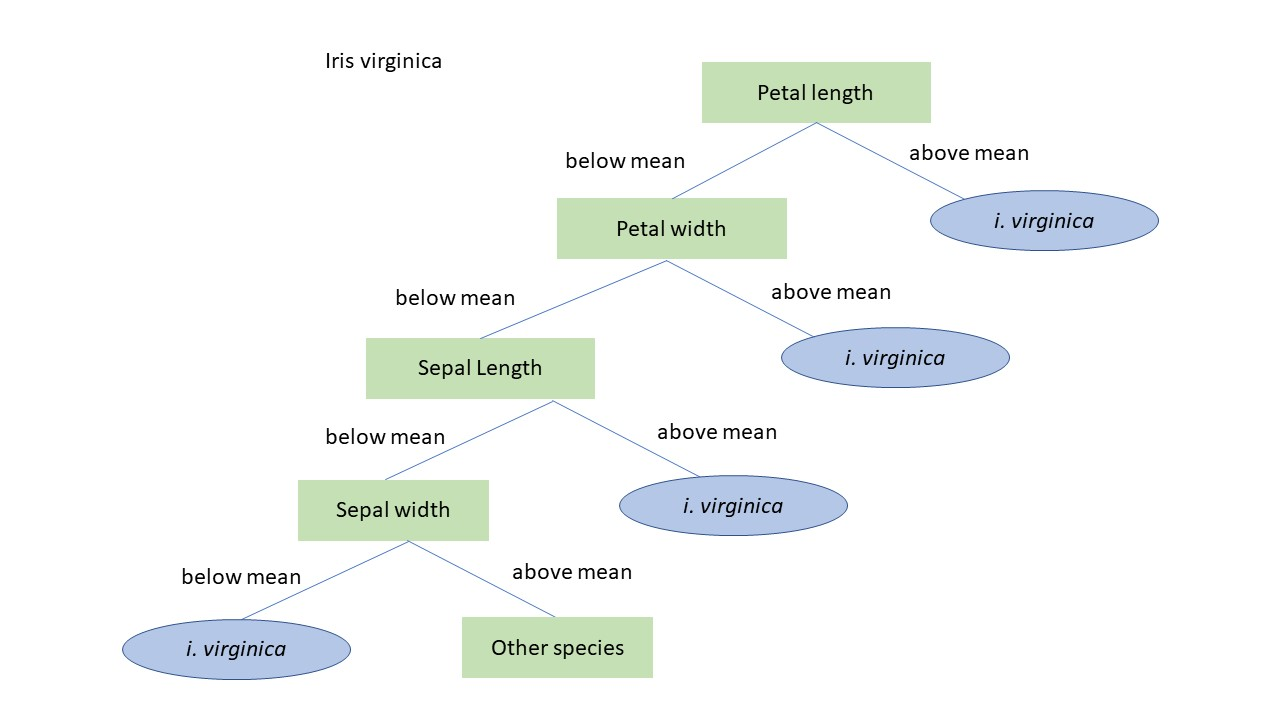

***Iris versicolor*** decision tree

*  The column with the highest indicator is placed at the top, in this case it is sepal width (below mean = 1) - if it is below mean it is *iris virginica* if not we would look at the petal length (above mean = 1). If petal length is above mean it is *iris versicolor* if below mean then we would look at the petal width. If petal width is above mean (0.89) it is iris versicolor. If below, we would look for sepal length. Based on the table above, if sepal length is above mean then it would be iris versicolor but if below then it would be any other species.


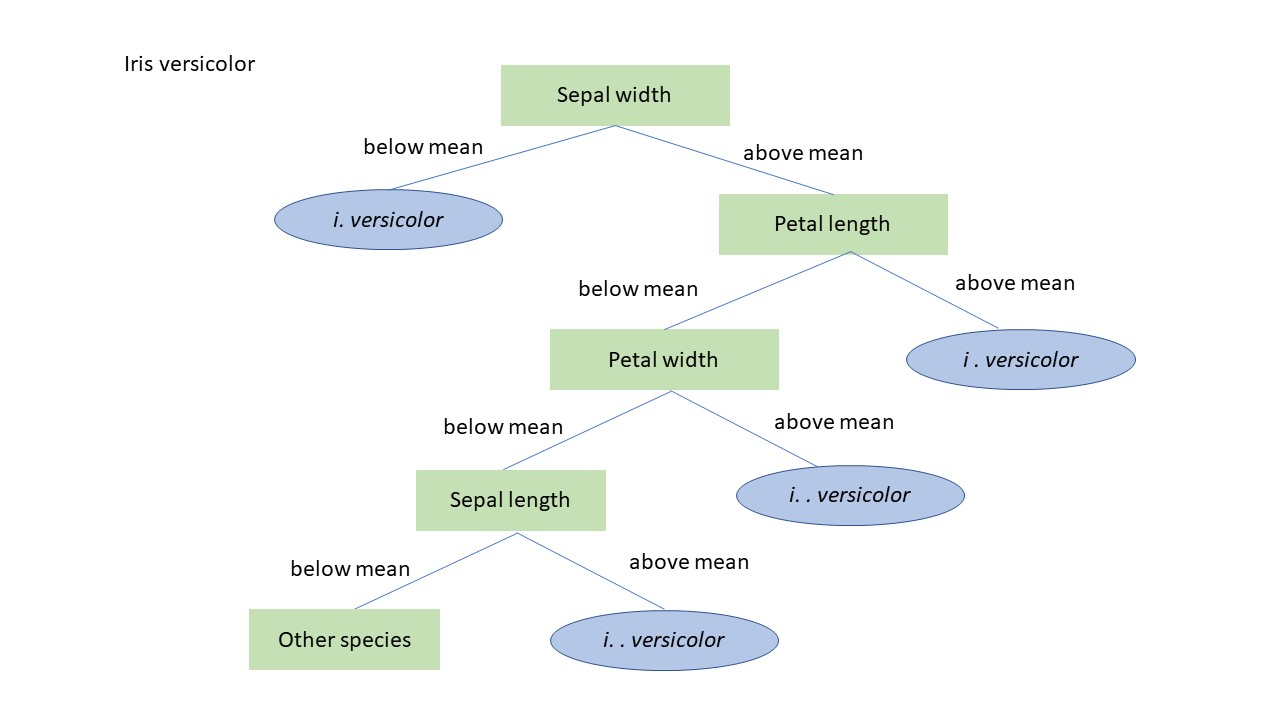

***Iris setosa*** decision tree

*  The column with the highest indicator in this case are petal length (all below  mean = 1) - if value is below mean it is iris setosa if not we would look at the sepal width (above mean = 1). If sepal width is above mean it is iris setosa otherwise it is another species.

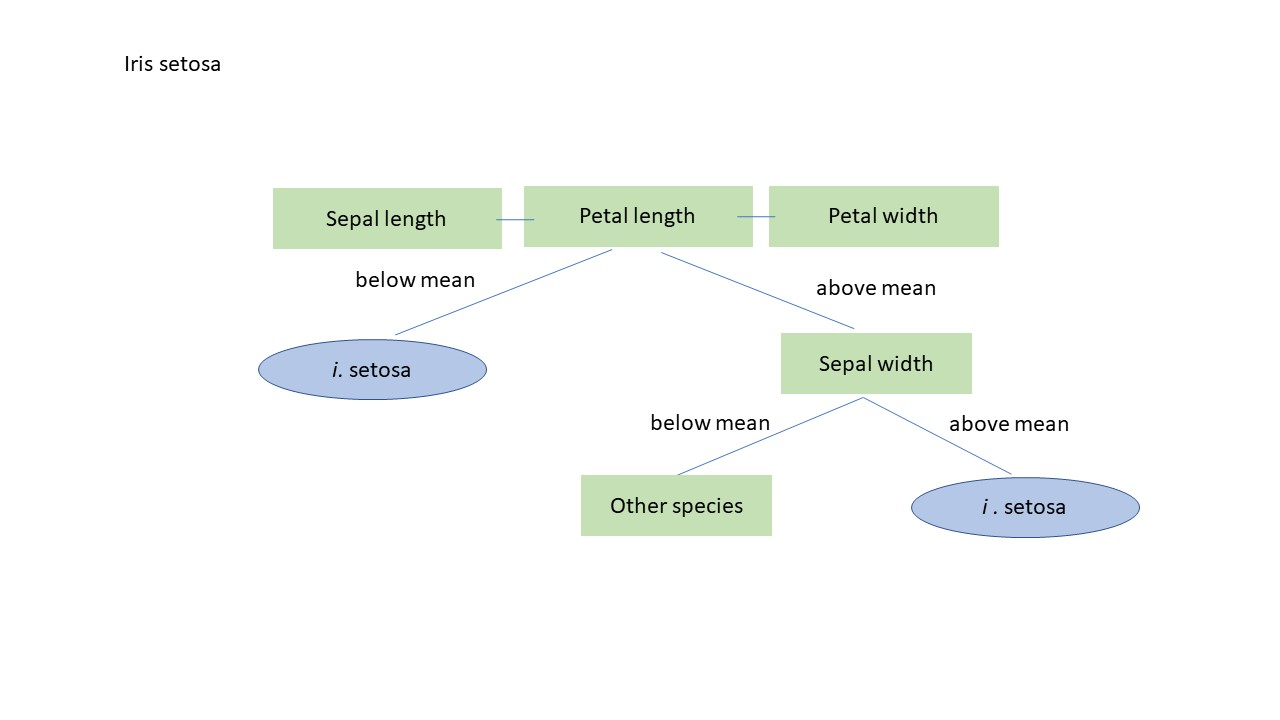

**Predicting *Iris virginica***

Using the function below will predict if the species is iris virginica based on the results obtained in exercise 4 and 5.
For example, we found that a good indicator for iris virginica were petal length and width with values above the mean. If this is correct then the proportion of iris viriginica correctly identified based on the mean will matched our decision tree. This calculation is then done for the other two species (please see cells below).

In [ ]:
def predict_species(df):
    if df['petal-width'] > mean_pw:
      if df['petal-length'] > mean_pl:
        #if df['sepal-length'] > mean_sl:
          #if df['sepal-width'] < mean_sw:
        return "Iris-virginica"
      else:
        return None
            #return "Iris-virginica"
       #else:
            #return None

# use the predict_species(df) function to predict the species, count how many are predicted correct and use this to calculate
# the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
    species = predict_species(test.iloc[i])
    if species == test.iloc[i]['species']:
        correct += 1

print ("Proportion correctly identified", correct / test_size) 

Proportion correctly identified 0.4666666666666667




> The efficiency with which Iris virginica can be classified when taking into account all four columns (petal length and width as well as sepal length and width) is 22%. From results previously obtained it was shown that only petal length, width and sepal length may be considered reliable factors. Thus, when using all three factors the efficiency with which iris virginica can be classified increases to 44.4%. From those three factors only petal length (above mean) and width (above mean) returned a value of 1 suggesting that using these two factors when classifying iris virginica should be enough. However, by only using these two factors the efficiency only increases only slightly (46.7%).





**Predicting *Iris versicolor***

In [ ]:
def predict_species(df):
    if df['sepal-width'] < mean_sw:
        if df['petal-length'] > mean_pl:
          #if df['petal-width'] > mean_pw:
            #if df['sepal-width'] > mean_sw:
          return "Iris-versicolor"
        else:
                return None
  

# use the predict_species(df) function to predict the species, count how many are predicted correct and use this to calculate
# the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
    species = predict_species(test.iloc[i])
    if species == test.iloc[i]['species']:
        correct += 1

print ("Proportion correctly identified", correct / test_size) 

Proportion correctly identified 0.17777777777777778


In exercises 4 and 5 results for iris versicolor indicated that values above the mean in sepal width (< mean: 0.88) and below the mean of petal length (> mean:0.82) were reliable indicators for the species followed by petal width(> mean:67). Using these results the efficiency with which *iris versicolor* can be predicted is only 13.3%. This increases to 17.8% if we only use sepal width and petal length. Although in previous analyses sepal  length showed a value just above the mean when taking this factor also into account the reliabilty of this species classification decreases to 0% indicating that sepal width may not be a reliable indicator of the species. 

**Predicting *Iris setosa***

In [ ]:
def predict_species(df):
    #if df['sepal-width'] > mean_sw:
        if df['petal-length'] < mean_pl:
          if df['petal-width'] < mean_pw:
                if df['sepal-length'] < mean_sl:
                  return "Iris-setosa"
                else:
                  return None
  

# use the predict_species(df) function to predict the species, count how many are predicted correct and use this to calculate
# the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
    species = predict_species(test.iloc[i])
    if species == test.iloc[i]['species']:
        correct += 1

print ("Proportion correctly identified", correct / test_size) 

Proportion correctly identified 0.28888888888888886


As shown in 6, the proportion of *iris setosa* showing values below the mean for sepal length (< mean: 1), petal length (< mean: 1) and petal width (< mean: 1) indicates these to be reliable indicators for this species, followed by sepal width (>mean: 0.82). Using these results the efficiency with which *iris setosa* can be predicted is 24.4%. If we were only to take sepal length, petal length and petal width the efficiency with which iris setosa can be predicted increases to 28.9%

### 8 - Changing the measure - using the median values instead

We are now looking at making the decision tree using median values to see whether the results would be more accurate if median values were used. 

Is the proportion of correct values better this time?   Is the decision tree still appropriate?


8. 1  Calculating the median values for all four columns

Median values are very similar to the mean values obtained in the previous exercise. This indicates that the data is above and below the mean is symmetrical distributed.
For reference, mean values for sepal length= 5.9,  sepal width=3.03,   petal-length= 3.8, petal-width=1.2

In [ ]:
#confirming that the calculated means are the same as the expected out using train.describe()
median_sl=train_encoded['sepal-length'].median()
median_sw=train_encoded['sepal-width'].median()
median_pl=train_encoded['petal-length'].median()
median_pw=train_encoded['petal-width'].median()

print(' sepal length: ', median_sl,"\n sepal width: ", median_sw,'\n petal length: ', median_pl, '\n petal width: ', median_pw)

 sepal length:  5.7 
 sepal width:  3.0 
 petal length:  4.2 
 petal width:  1.3


In [ ]:
def encode_iris(train_encoded, **kwds):
  median=kwds['median']
  key=kwds['key']

  if train_encoded[key]> median:
    return 1
  else:
    return 0



#to avoid confusion new columns with a 'above_' are created to store the results 
#please note that after this process the dataframe 'train_encoded' has changed (it now has 4 extra columns as shown below)
train_encoded["above_sepal_length"]=train_encoded.apply(encode_iris, axis=1, key='sepal-length', median=median_sl)
train_encoded["above_sepal_width"]=train_encoded.apply(encode_iris, axis=1, key='sepal-width', median=median_sw)
train_encoded["above_petal_length"]=train_encoded.apply(encode_iris, axis=1, key='petal-length', median=median_pl)
train_encoded["above_petal_width"]=train_encoded.apply(encode_iris, axis=1, key='petal-width', median=median_pw)
train_encoded


,sepal-length,sepal-width,petal-length,petal-width,species,above_sepal_length,above_sepal_width,above_petal_length,above_petal_width,below_sepal_length,below_sepal_width,below_petal_length,below_petal_width
49,5.0,3.3,1.4,0.2,Iris-setosa,0,1,0,0,1,0,1,1
111,6.4,2.7,5.3,1.9,Iris-virginica,1,0,1,1,0,1,0,0
42,4.4,3.2,1.3,0.2,Iris-setosa,0,1,0,0,1,0,1,1
78,6.0,2.9,4.5,1.5,Iris-versicolor,1,0,1,1,0,1,0,0
129,7.2,3.0,5.8,1.6,Iris-virginica,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,Iris-versicolor,1,0,0,0,0,1,0,0
64,5.6,2.9,3.6,1.3,Iris-versicolor,0,0,0,0,1,1,1,0
55,5.7,2.8,4.5,1.3,Iris-versicolor,0,0,1,0,1,1,0,0
89,5.5,2.5,4.0,1.3,Iris-versicolor,0,0,0,0,1,1,0,0


In [ ]:
def encode_iris(train_encoded, **kwds):
  median=kwds['median']
  key=kwds['key']

  if train_encoded[key]< median:
    return 1
  else:
    return 0

#to avoid confusion new columns with a 'above_' are created to store the results 
#please note that after this process the dataframe 'train_encoded' has changed (it now has 4 extra columns as shown below)
train_encoded["below_sepal_length"]=train_encoded.apply(encode_iris, axis=1, key='sepal-length', median=median_sl)
train_encoded["below_sepal_width"]=train_encoded.apply(encode_iris, axis=1, key='sepal-width', median=median_sw)
train_encoded["below_petal_length"]=train_encoded.apply(encode_iris, axis=1, key='petal-length', median=median_pl)
train_encoded["below_petal_width"]=train_encoded.apply(encode_iris, axis=1, key='petal-width', median=median_pw)
train_encoded


,sepal-length,sepal-width,petal-length,petal-width,species,above_sepal_length,above_sepal_width,above_petal_length,above_petal_width,below_sepal_length,below_sepal_width,below_petal_length,below_petal_width
49,5.0,3.3,1.4,0.2,Iris-setosa,0,1,0,0,1,0,1,1
111,6.4,2.7,5.3,1.9,Iris-virginica,1,0,1,1,0,1,0,0
42,4.4,3.2,1.3,0.2,Iris-setosa,0,1,0,0,1,0,1,1
78,6.0,2.9,4.5,1.5,Iris-versicolor,1,0,1,1,0,1,0,0
129,7.2,3.0,5.8,1.6,Iris-virginica,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,Iris-versicolor,1,0,0,0,0,1,1,0
64,5.6,2.9,3.6,1.3,Iris-versicolor,0,0,0,0,1,1,1,0
55,5.7,2.8,4.5,1.3,Iris-versicolor,0,0,1,0,0,1,0,0
89,5.5,2.5,4.0,1.3,Iris-versicolor,0,0,0,0,1,1,1,0


8.2 ***Iris Virginica*** - *Calculating proportions above median*

In [ ]:
def calculate_proportion():
  #Getting a count of all the rows with name 'iris virginica' in the column species
  train_species_count=train_encoded.loc[(train_encoded['species']=='Iris-virginica')]['species'].count()

  #Getting a count per column of all iris virignica  with values above mean (>1)
  count_virg_sl=train_encoded.loc[(train_encoded['species']=='Iris-virginica')& (train_encoded['above_sepal_length']==1)]['above_sepal_length'].count()
  count_virg_sw=train_encoded.loc[(train_encoded['species']=='Iris-virginica')& (train_encoded['above_sepal_width']==1)]['above_sepal_width'].count()
  count_virg_pl=train_encoded.loc[(train_encoded['species']=='Iris-virginica')& (train_encoded['above_petal_length']==1)]['above_petal_length'].count()
  count_virg_pw=train_encoded.loc[(train_encoded['species']=='Iris-virginica')& (train_encoded['above_petal_width']==1)]['above_petal_width'].count()

  #Calculating the proportion per column of iris virginica that is above the mean (count of iris virginica >1/total count of iris virginica)
  proportion_ivirg_sl=count_virg_sl/train_species_count
  proportion_ivirg_sw=count_virg_sw/train_species_count
  proportion_ivirg_pl=count_virg_pl/train_species_count
  proportion_ivirg_pw=count_virg_pw/train_species_count

  #Calculating the proportion per column that is above the mean but is not iris virginica (1-proportion that is)
  not_iris_sl=1-proportion_ivirg_sl
  not_iris_sw=1-proportion_ivirg_sw
  not_iris_pl=1-proportion_ivirg_pl
  not_iris_pw=1-proportion_ivirg_pw

  print("Virginica_count=", train_species_count,"\n sepal length count:", count_virg_sl,"\n sepal width count:", count_virg_sw, "\n petal length count:", count_virg_pl, "\n petal width count:", count_virg_pw, "\n proportion of i.virginica where sepal_legth > median:", proportion_ivirg_sl,"\n proportion of i.virginica where sepal_width > median:", proportion_ivirg_sw,"\n proportion of i.virginica where petal_legth > median:", proportion_ivirg_pl, "\n proportion of i.virginica where petal_width > median:", proportion_ivirg_pw,"\n proportion that is not i.virginica (sepal_length):", round(not_iris_sl,2), "\n proportion that is not i.virginica (sepal_width):", round(not_iris_sw,2),"\n proportion that is not i.virginica (petal_length):", round(not_iris_pl,2),"\n proportion that is not i.virginica (petal_width):", round(not_iris_pw,2))

calculate_proportion()

Virginica_count= 29 
 sepal length count: 27 
 sepal width count: 7 
 petal length count: 29 
 petal width count: 29 
 proportion of i.virginica where sepal_legth > median: 0.9310344827586207 
 proportion of i.virginica where sepal_width > median: 0.2413793103448276 
 proportion of i.virginica where petal_legth > median: 1.0 
 proportion of i.virginica where petal_width > median: 1.0 
 proportion that is not i.virginica (sepal_length): 0.07 
 proportion that is not i.virginica (sepal_width): 0.76 
 proportion that is not i.virginica (petal_length): 0.0 
 proportion that is not i.virginica (petal_width): 0.0


*8.2.1 Calculating the proportion below median of iris virginica*

In [ ]:
def calculate_proportion_below():
  #Getting a count of all the rows with name 'iris virginica' in the column species
  train_species_count=train_encoded.loc[(train_encoded['species']=='Iris-virginica')]['species'].count()
  #Counts of iris virginica < mean
  count_virg_sl=train_encoded.loc[(train_encoded['species']=='Iris-virginica')& (train_encoded['below_sepal_length']==1)]['below_sepal_length'].count()
  count_virg_sw=train_encoded.loc[(train_encoded['species']=='Iris-virginica')& (train_encoded['below_sepal_width']==1)]['below_sepal_width'].count()
  count_virg_pl=train_encoded.loc[(train_encoded['species']=='Iris-virginica')& (train_encoded['below_petal_length']==1)]['below_petal_length'].count()
  count_virg_pw=train_encoded.loc[(train_encoded['species']=='Iris-virginica')& (train_encoded['below_petal_width']==1)]['below_petal_width'].count()

  #Calculating the proportion per column of iris virginica that is below the mean (count of iris virginica <1/total count of iris virginica)
  p_ivirg_sl=count_virg_sl/train_species_count
  p_ivirg_sw=count_virg_sw/train_species_count
  p_ivirg_pl=count_virg_pl/train_species_count
  p_ivirg_pw=count_virg_pw/train_species_count

  #Calculating the proportion per column that is below the mean but is not iris virginica (1-proportion that is)
  not_iris_sl=1-p_ivirg_sl
  not_iris_sw=1-p_ivirg_sw
  not_iris_pl=1-p_ivirg_pl
  not_iris_pw=1-p_ivirg_pw
  print("Virginica_count is: ", train_species_count,"\n sepal length count:", count_virg_sl,"\n sepal width count:", count_virg_sw, "\n petal length count:", count_virg_pl, "\n petal width count:", count_virg_pw, "\n proportion of i.virginica where sepal_length < mean:", p_ivirg_sl,"\n proportion of i.virginica where sepal_width < mean:", p_ivirg_sw,"\n proportion of i.virginica where petal_length < mean:", p_ivirg_pl, "\n proportion of i.virginica where petal_width < mean:", p_ivirg_pw,"\n proportion that is not i.virginica (sepal length):", round(not_iris_sl,2), "\n proportion that is not i.virginica (sepal width):", round(not_iris_sw,2),"\n proportion that is not i.virginica (petal length):", round(not_iris_pl,2),"\n proportion that is not i.virginica (petal width):", round(not_iris_pw,2))

calculate_proportion_below()


Virginica_count is:  29 
 sepal length count: 2 
 sepal width count: 15 
 petal length count: 0 
 petal width count: 0 
 proportion of i.virginica where sepal_length < mean: 0.06896551724137931 
 proportion of i.virginica where sepal_width < mean: 0.5172413793103449 
 proportion of i.virginica where petal_length < mean: 0.0 
 proportion of i.virginica where petal_width < mean: 0.0 
 proportion that is not i.virginica (sepal length): 0.93 
 proportion that is not i.virginica (sepal width): 0.48 
 proportion that is not i.virginica (petal length): 1.0 
 proportion that is not i.virginica (petal width): 1.0


8.3 ***Iris versicolor*** - *Calculating proportions above median*

In [ ]:
def calculate_proportion():
  train_species_count=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')]['species'].count()
  count_vers_sl=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')& (train_encoded['above_sepal_length']==1)]['above_sepal_length'].count()
  count_vers_sw=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')& (train_encoded['above_sepal_width']==1)]['above_sepal_width'].count()
  count_vers_pl=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')& (train_encoded['above_petal_length']==1)]['above_petal_length'].count()
  count_vers_pw=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')& (train_encoded['above_petal_width']==1)]['above_petal_width'].count()
  proportion_ivers_sl=count_vers_sl/train_species_count
  proportion_ivers_sw=count_vers_sw/train_species_count
  proportion_ivers_pl=count_vers_pl/train_species_count
  proportion_ivers_pw=count_vers_pw/train_species_count
  not_iris_sl=1-proportion_ivers_sl
  not_iris_sw=1-proportion_ivers_sw
  not_iris_pl=1-proportion_ivers_pl
  not_iris_pw=1-proportion_ivers_pw
  print("Versicolor count=", train_species_count,"\n sepal length count:", count_vers_sl,"\n sepal width count:", count_vers_sw, "\n petal length count:", count_vers_pl, "\n petal width count:", count_vers_pw, "\n proportion of i.versicolor where sepal_legth > median:", proportion_ivers_sl,"\n proportion of i.versicolor where sepal_width > median:", proportion_ivers_sw,"\n proportion of i.versicolor where petal_legth > median:", proportion_ivers_pl, "\n proportion of i.versicolor where petal_width > median:", proportion_ivers_pw,"\n proportion that is not i.versicolor (sepal length):", round(not_iris_sl,2), "\n proportion that is not i.versicolor (sepal width):", round(not_iris_sw,2),"\n proportion that is not i.versicolor (petal length):", round(not_iris_pl,2),"\n proportion that is not i.versicolor (petal width):", round(not_iris_pw,2))

calculate_proportion()

Versicolor count= 39 
 sepal length count: 23 
 sepal width count: 6 
 petal length count: 21 
 petal width count: 17 
 proportion of i.versicolor where sepal_legth > median: 0.5897435897435898 
 proportion of i.versicolor where sepal_width > median: 0.15384615384615385 
 proportion of i.versicolor where petal_legth > median: 0.5384615384615384 
 proportion of i.versicolor where petal_width > median: 0.4358974358974359 
 proportion that is not i.versicolor (sepal length): 0.41 
 proportion that is not i.versicolor (sepal width): 0.85 
 proportion that is not i.versicolor (petal length): 0.46 
 proportion that is not i.versicolor (petal width): 0.56


8.3.1 *Calculating the proportion below median*

In [ ]:
def calculate_proportion_below():
  train_species_count=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')]['species'].count()
  #Counts of iris virginica < mean
  count_vers_sl=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')& (train_encoded['below_sepal_length']==1)]['below_sepal_length'].count()
  count_vers_sw=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')& (train_encoded['below_sepal_width']==1)]['below_sepal_width'].count()
  count_vers_pl=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')& (train_encoded['below_petal_length']==1)]['below_petal_length'].count()
  count_vers_pw=train_encoded.loc[(train_encoded['species']=='Iris-versicolor')& (train_encoded['below_petal_width']==1)]['below_petal_width'].count()
  p_ivers_sl=count_vers_sl/train_species_count
  p_ivers_sw=count_vers_sw/train_species_count
  p_ivers_pl=count_vers_pl/train_species_count
  p_ivers_pw=count_vers_pw/train_species_count
  not_iris_sl=1-p_ivers_sl
  not_iris_sw=1-p_ivers_sw
  not_iris_pl=1-p_ivers_pl
  not_iris_pw=1-p_ivers_pw
  print("Versicolor count is: ", train_species_count,"\n sepal length count:", count_vers_sl,"\n sepal width count:", count_vers_sw, "\n petal length count:", count_vers_pl, "\n petal width count:", count_vers_pw, "\n proportion of i.versicolor where sepal_length < median:", p_ivers_sl,"\n proportion of i.versicolor where sepal_width < median:", p_ivers_sw,"\n proportion of i.versicolor where petal_length < median:", p_ivers_pl, "\n proportion of i.versicolor where petal_width < median:", p_ivers_pw,"\n proportion that is not i.versicolor (sepal length):", round(not_iris_sl,2),"\n proportion that is not i.versicolor (sepal width):", round(not_iris_sw,2), "\n proportion that is not i.versicolor (petal length):", round(not_iris_pl,2), "\n proportion that is not i.versicolor (petal width):", round(not_iris_pw,2))

calculate_proportion_below()


Versicolor count is:  39 
 sepal length count: 12 
 sepal width count: 28 
 petal length count: 15 
 petal width count: 11 
 proportion of i.versicolor where sepal_length < median: 0.3076923076923077 
 proportion of i.versicolor where sepal_width < median: 0.717948717948718 
 proportion of i.versicolor where petal_length < median: 0.38461538461538464 
 proportion of i.versicolor where petal_width < median: 0.28205128205128205 
 proportion that is not i.versicolor (sepal length): 0.69 
 proportion that is not i.versicolor (sepal width): 0.28 
 proportion that is not i.versicolor (petal length): 0.62 
 proportion that is not i.versicolor (petal width): 0.72


8.4  **Iris setosa**- Calculating the proportion above median

In [ ]:
def calculate_proportion():
  train_species_count=train_encoded.loc[(train_encoded['species']=='Iris-setosa')]['species'].count()
  count_set_sl=train_encoded.loc[(train_encoded['species']=='Iris-setosa') & (train_encoded['above_sepal_length']==1)]['above_sepal_length'].count()
  count_set_sw=train_encoded.loc[(train_encoded['species']=='Iris-setosa') & (train_encoded['above_sepal_width']==1)]['above_sepal_width'].count()
  count_set_pl=train_encoded.loc[(train_encoded['species']=='Iris-setosa') & (train_encoded['above_petal_length']==1)]['above_petal_length'].count()
  count_set_pw=train_encoded.loc[(train_encoded['species']=='Iris-setosa') & (train_encoded['above_petal_width']==1)]['above_petal_width'].count()

  proportion_iset_sl=count_set_sl/train_species_count
  proportion_iset_sw=count_set_sw/train_species_count
  proportion_iset_pl=count_set_pl/train_species_count
  proportion_iset_pw=count_set_pw/train_species_count
  not_iset_sl=1-proportion_iset_sl
  not_iset_sw=1-proportion_iset_sw
  not_iset_pl=1-proportion_iset_pl
  not_iset_pw=1-proportion_iset_pw
  print("Setosa count=", train_species_count,"\n sepal length count:", count_set_sl,"\n sepal width count:", count_set_sw, "\n petal length count:", count_set_pl, "\n petal width count:", count_set_pw, "\n proportion of i.setosa where sepal_legth > median:", proportion_iset_sl,"\n proportion of i.setosa where sepal_width > median:", proportion_iset_sw,"\n proportion of i.setosa where petal_legth > median:", proportion_iset_pl, "\n proportion of i.setosa where petal_width > median:", proportion_iset_pw,"\n proportion that is not i.setosa (sepal length):", round(not_iset_sl,2),"\n proportion that is not i.setosa (sepal width):", round(not_iset_sw,2), "\n proportion that is not i.setosa(petal length):", round(not_iset_pl,2), "\n proportion that is not i.setosa (petal width):", round(not_iset_pw,2))

calculate_proportion()

Setosa count= 34 
 sepal length count: 0 
 sepal width count: 28 
 petal length count: 0 
 petal width count: 0 
 proportion of i.setosa where sepal_legth > median: 0.0 
 proportion of i.setosa where sepal_width > median: 0.8235294117647058 
 proportion of i.setosa where petal_legth > median: 0.0 
 proportion of i.setosa where petal_width > median: 0.0 
 proportion that is not i.setosa (sepal length): 1.0 
 proportion that is not i.setosa (sepal width): 0.18 
 proportion that is not i.setosa(petal length): 1.0 
 proportion that is not i.setosa (petal width): 1.0


8.4.1 *Calculating the proportion below median*

In [ ]:
def calculate_proportion_below():
  train_species_count=train_encoded.loc[(train_encoded['species']=='Iris-setosa')]['species'].count()
  #Counts of iris virginica < mean
  count_setosa_sl=train_encoded.loc[(train_encoded['species']=='Iris-setosa')& (train_encoded['below_sepal_length']==1)]['below_sepal_length'].count()
  count_setosa_sw=train_encoded.loc[(train_encoded['species']=='Iris-setosa')& (train_encoded['below_sepal_width']==1)]['below_sepal_width'].count()
  count_setosa_pl=train_encoded.loc[(train_encoded['species']=='Iris-setosa')& (train_encoded['below_petal_length']==1)]['below_petal_length'].count()
  count_setosa_pw=train_encoded.loc[(train_encoded['species']=='Iris-setosa')& (train_encoded['below_petal_width']==1)]['below_petal_width'].count()
  p_iset_sl=count_setosa_sl/train_species_count
  p_iset_sw=count_setosa_sw/train_species_count
  p_iset_pl=count_setosa_pl/train_species_count
  p_iset_pw=count_setosa_pw/train_species_count
  not_iset_sl=1-p_iset_sl
  not_iset_sw=1-p_iset_sw
  not_iset_pl=1-p_iset_pl
  not_iset_pw=1-p_iset_pw
  print("Setosa count is: ", train_species_count,"\n sepal length count:", count_setosa_sl,"\n sepal width count:", count_setosa_sw, "\n petal length count:", count_setosa_pl, "\n petal width count:", count_setosa_pw, "\n proportion of i.setosa where sepal_length < mean:", p_iset_sl,"\n proportion of i.setosa where sepal_width < mean:", p_iset_sw,"\n proportion of i.setosa where petal_length < mean:", p_iset_pl, "\n proportion of i.setosa where petal_width < mean:", p_iset_pw,"\n proportion that is not i.setosa (sepal length):", round(not_iset_sl,2),"\n proportion that is not i.setosa (sepal width):", round(not_iset_sw,2), "\n proportion that is not i.setosa(petal length):", round(not_iset_pl,2), "\n proportion that is not i.setosa (petal width):", round(not_iset_pw,2))

calculate_proportion_below()

Setosa count is:  34 
 sepal length count: 33 
 sepal width count: 2 
 petal length count: 34 
 petal width count: 34 
 proportion of i.setosa where sepal_length < mean: 0.9705882352941176 
 proportion of i.setosa where sepal_width < mean: 0.058823529411764705 
 proportion of i.setosa where petal_length < mean: 1.0 
 proportion of i.setosa where petal_width < mean: 1.0 
 proportion that is not i.setosa (sepal length): 0.03 
 proportion that is not i.setosa (sepal width): 0.94 
 proportion that is not i.setosa(petal length): 0.0 
 proportion that is not i.setosa (petal width): 0.0


7.5 Creating a dataframe that displays the proportion (above and below median) of all species. 
>Below is the table with the mean values for reference (see exercise 6)

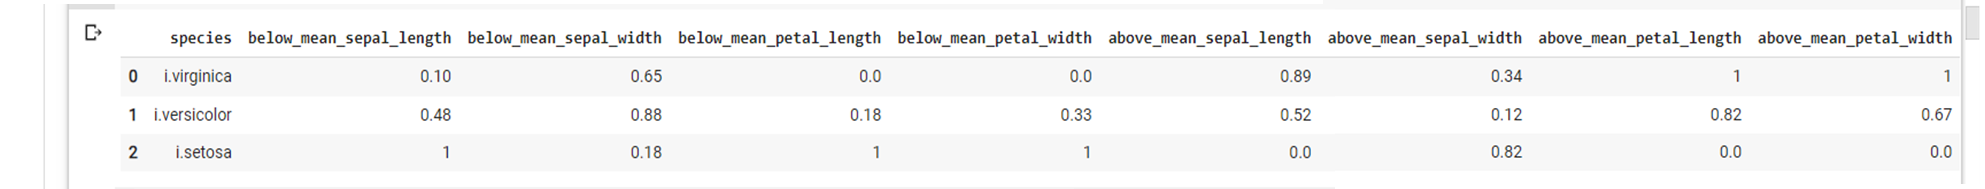

In [ ]:
import numpy as np
import pandas as pd
 
data = {'species': ["i.virginica", 'i.versicolor', 'i.setosa'], 
        'below_median_sepal_length': ["0.0", '0.39', '1'],
        'below_median_sepal_width': ["0.39", '0.79', '0.06'],
        'below_median_petal_length': ["0.0", '0.54', '1'],
        'below_median_petal_width': ["0.0", '0.33', '1'],
        'above_median_sepal_length': ["0.90", '0.51', '0'],
        'above_median_sepal_width': ["0.34", '0.12', '0.82'],
        'above_median_petal_length': ["1", '0.36', '0.0'],
        'above_median_petal_width': ["1", '0.33', '0.0']}
# pass column names in the columns parameter 
iris_stats_median = pd.DataFrame(data)
iris_stats_median

,species,below_median_sepal_length,below_median_sepal_width,below_median_petal_length,below_median_petal_width,above_median_sepal_length,above_median_sepal_width,above_median_petal_length,above_median_petal_width
0,i.virginica,0.0,0.39,0.0,0.0,0.90,0.34,1,1
1,i.versicolor,0.39,0.79,0.54,0.33,0.51,0.12,0.36,0.33
2,i.setosa,1,0.06,1,1,0,0.82,0.0,0.0


Comparing results obtained for the proportion of *iris virginica* and *iris setosa*, both below and above mean and median, show that indicators previously defined as reliable (>0.5) for both species remain. However, the outcome  for *iris versicolor* is different where the proportion of this species using the median values for petal width increases while the opposite is seen for petal length. This may indicate that the data for iris versicolor is skewed.

### Exercise 8 - try different measures
---

Do the same again but with upper quantile, then again with the lower quantile.  Is it making any difference?  Which give the best looking results?

### Exercise 9 - try a different species

Run the mean test again for the Iris-versicolor species.  Again, try some different decision making lines.

What are the results.  Record them in the text cell below:

Write your answers here:  

### Distribution of **mean values** for petal length and width of *i.virginica, i. setosa and i.versicolor*

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


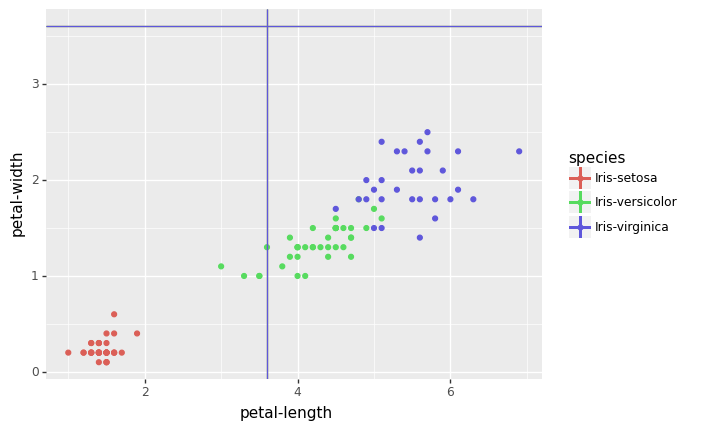

<ggplot: (8748202797249)>

In [ ]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train, aes(xintercept=train['petal-length'].mean(), color='species')) + geom_hline(train, aes(yintercept=train['petal-length'].mean(), color='species'))

The distribution plot above show the correlation between petal length and width among species. Iris virginica petal length correlates with its petal width - the larger the petal the wider it is. The opposite is seen in iris setosa in which the smaller the petal, the narrower it will be. 

### Distribution of **median values** for petal length and width of *i.virginica, i. setosa and i.versicolor*

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


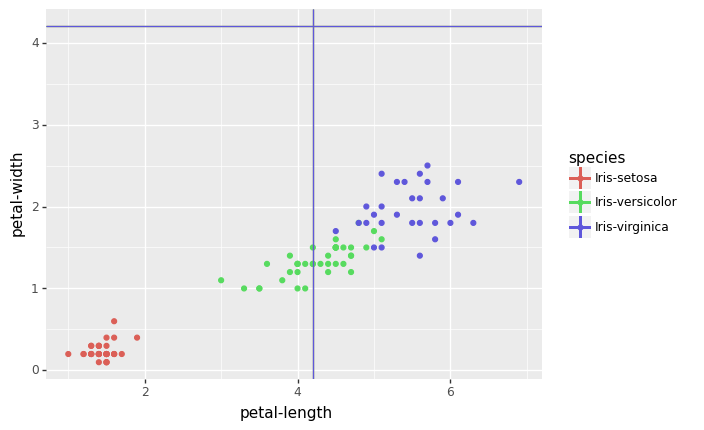

<ggplot: (8748202743557)>

In [ ]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train, aes(xintercept=train['petal-length'].median(), color='species')) + geom_hline(train, aes(yintercept=train['petal-length'].median(), color='species'))

The distribution plot above show the correlation of petal length and width using median values. Although the distribution of both iris virginica and setosa looks very simiilar to the plot above showing the mean values, iris versicolor's distribution is larger below the median value than it is below the mean value. This may explain the increase in the proportion of iris versicolor with a petal length below median seen in 7.5 

### Distribution of mean values for sepal length and width of *i.virginica, i. setosa and i.versicolor*

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


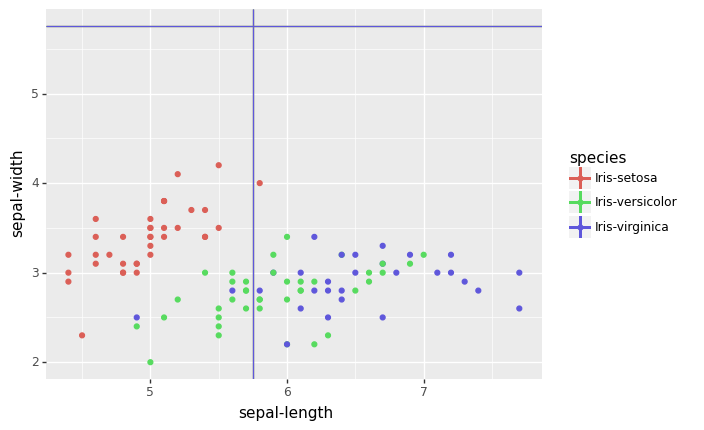

<ggplot: (8748202695181)>

In [ ]:
from plotnine import *
ggplot(train, aes(x='sepal-length', y='sepal-width', color='species')) + geom_point() + geom_vline(train, aes(xintercept=train['sepal-length'].mean(), color='species')) + geom_hline(train, aes(yintercept=train['sepal-length'].mean(), color='species'))

### Distribution of median values for sepal length and width of *i.virginica, i. setosa and i.versicolor*

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


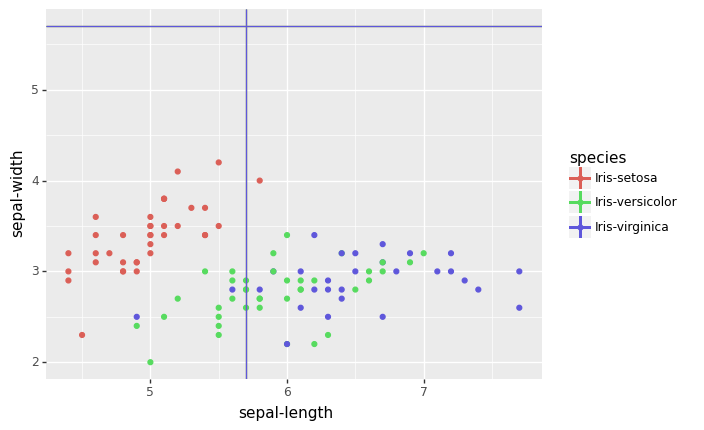

<ggplot: (8748202617517)>

In [ ]:
from plotnine import *
ggplot(train, aes(x='sepal-length', y='sepal-width', color='species')) + geom_point() + geom_vline(train, aes(xintercept=train['sepal-length'].median(), color='species')) + geom_hline(train, aes(yintercept=train['sepal-length'].median(), color='species'))

The correlation between sepal length and sepal width using mean and median value show similar pattern. However, it can be said that out of all three species iris setosa appear to have smaller but wider sepals compare to iris virginica and iris versicolor.

**CONCLUSION**

A decision tree based on mean values (above and below) for both iris virginica and iris setosa showed that good indicators of the species may be petal length and petal width for the former( 46.7%) and sepal length, petal length and width (28.4%) for the latter. Good indicators for iris versicolor were found to be sepal width and petal length with values below the mean (17.8%). However, a comparison between mean and median values for iris versicolor showed discrepancies in petal length and width which may indicate that the data  is not symmetrically distributed. 
 Although more tests looking into the significance of this data may be needed decision trees for all iris species could be created based on calculations made from a rather small data set. 


**Reflection:**

There are a few things that I learned in this project:


  
*  Using encoding to grouped data within a column for analysis


*   adding titles to columns when the data set has none

*   Learning to split a data set for analysis

*   learning to make a decision tree based on results calculated by myself


*   Exposure to ggplots






***Issues:***
At the beginning of the project I decided to separate each species into single dataframes. Half way through doing the calculations I realised that the task was already cumbersome in a data set that only contained 105 rows and so most probably wrong. Therefore I changed tactic and worked from a single dataframe (which makes more sense since this why we use pandas in the first place). Another issue I encountered was when a copy of the original data set was not done and was therefore changed after encoding. Again, I will now be more aware of making a copy of the original set before making changes.  




